# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## Take a look at the data

In [8]:
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB



## Is the distribution of body temperatures normal?

Plot a qq plot where the sample quantiles are plotted against the theortical quantiles of a normal distribution. If the data were normally distributed we would expect to see the sample quantiles coincide with the theoretical quantiles.

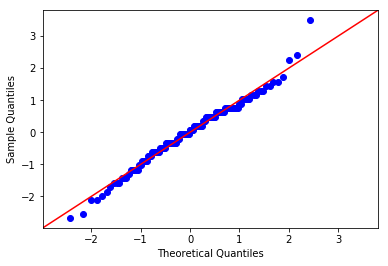

In [10]:
from scipy import stats
import statsmodels.api as sm

% matplotlib inline

fig = sm.graphics.qqplot(df['temperature'], dist=stats.norm, line='45', fit=True)



In the above plot, the sample quantiles shown in blue and the red line is the line we woudl get if they coincided with the theoretical quantiles. There is quite a good correspondance excepting at the end points. 


In the plot below a histogram of the temperature data is overlaid by a normal density curve with mean and variance equal to that of the observed temperture. 

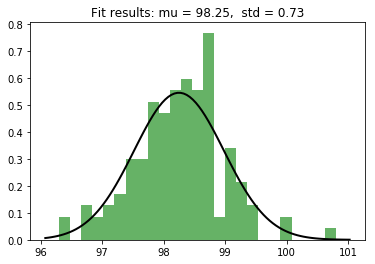

In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt




# Fit a normal distribution to the data:
mu, std = norm.fit(df['temperature'])

# Plot the histogram.
plt.hist(df['temperature'], bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

The correspondance between the shape of the histogram and the normal density curve are quite good indicating that it would be resonable to assume that the data are normally distributed. 

Here we will carry out three statistical tests for normality:https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm
1. Shapiro-Wilks test for normality
2. normaltest: It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
3. anderson-darling test for normality 


In [12]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistics=0.987, p=0.233
Sample looks Normal (fail to reject H0)


In [13]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Normal (fail to reject H0)')
else:
    print('Sample does not look Normal (reject H0)')

Statistics=2.704, p=0.259
Sample looks Normal (fail to reject H0)


In [15]:
from scipy.stats import anderson

# normality test
result = anderson(df['temperature'])
print('Statistic: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.2f: %.2f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.2f: %.2f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.520
15.00: 0.56, data looks normal (fail to reject H0)
10.00: 0.64, data looks normal (fail to reject H0)
5.00: 0.77, data looks normal (fail to reject H0)
2.50: 0.89, data looks normal (fail to reject H0)
1.00: 1.06, data looks normal (fail to reject H0)


#### Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t  or  z  statistic?
Now try using the other test. How is the result be different? Why?

Bootstrap Hypothesis test for the population mean =98.6 degrees F

In [30]:
# obtain a bootstrap sample from the original data:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(62)

In [31]:
#define function ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x =np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

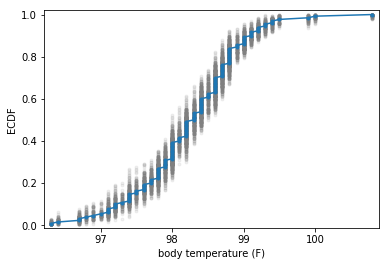

In [32]:
for _ in range(100):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df['temperature'], size=len(df['temperature']))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(df['temperature'])
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('body temperature (F)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


In [33]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [34]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func )

    return bs_replicates

0.06405661469519336
0.06334479992948529


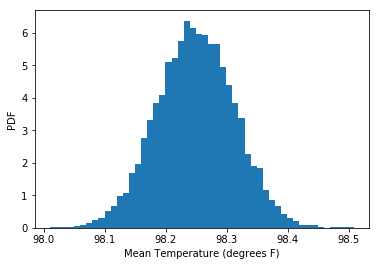

In [35]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['temperature'], np.mean, size=10000)

# Compute and print SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Mean Temperature (degrees F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [36]:
# Make an array of temperature measurements adjusted to have a mean of 98.6
adjusted_temp = df['temperature'] - np.mean(df['temperature']) + 98.6

# Take bootstrap replicates of the translated temperatures: bs_replicates
bs_replicates = draw_bs_reps(adjusted_temp, np.mean , 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


### frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
Use a one sample test as we want to test if the mean of the sample differs from a constant rather than compare means of two samples. 

In [38]:
stats.ttest_1samp(a=df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [ ]:
The p value gives the probability of seeing a mean as extreme as the sample mean if the population mean 
was equal to 98.6. In this case the p value is very very small indicating that we should reject the null hypothesis that hte pop mean is =98.6

In [ ]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

In [48]:
# function to carry out a Z test
def Ztest_1samp(x1, mu):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    zeta = (np.mean(x1) - mu)/(np.sqrt(np.var(x1)/len(x1)))
    pval = 2*(1 - norm.cdf(abs(zeta)))
    return np.round(zeta, 3), np.round(pval, 4)
   

In [49]:
Ztest_1samp(df['temperature'], 98.6)

(-5.476, 0.0)

https://stats.stackexchange.com/questions/181812/what-happens-if-i-use-z-test-instead-of-t-test

Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic? 

In [51]:
sample_10 =np.random.choice(df['temperature'], size=10)

sample_10


In [53]:
# t test
stats.ttest_1samp(a=sample_10, popmean=98.6)

Ttest_1sampResult(statistic=-2.2107343330111995, pvalue=0.0543800532883812)

In [54]:
Ztest_1samp(sample_10, 98.6)

(-2.33, 0.0198)

At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [64]:
# confidence interval for mean using bootstrap approach
bs_replicates = draw_bs_reps(df['temperature'], np.mean , 10000)

0.06405661469519336
0.06422956187713717


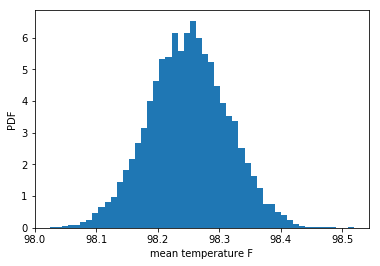

In [67]:
# Compute and print SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean temperature F')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [68]:
 conf_int = np.percentile(bs_replicates, [2.5, 97.5]) 
 conf_int

array([98.12230769, 98.37538462])

In [77]:
# bootstrap confidence interval for selecting a single observation.
# draw a boot strap sample of size len(data), select one observation

# function to select one observation from a bootstrap sample
def select_1_obs(bs_sample):
        bs_obs_1=np.random.choice(bs_sample, size=1)
        return bs_obs_1


In [82]:
bs_replicates_1 = draw_bs_reps(df['temperature'], select_1_obs , 10000)

0.7303577789050377
0.7378593090827001


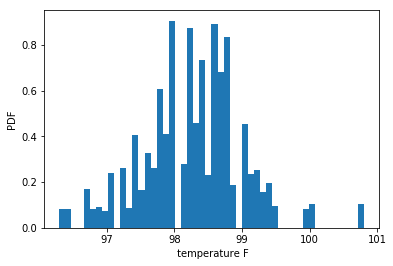

In [83]:
# Compute and print std deviation for the original sample
std_orig = np.std(df['temperature']) 
print(std_orig)

# Compute and print standard deviation of bootstrap replicates
bs_std_1 = np.std(bs_replicates_1)
print(bs_std_1)

# Make a histogram of the results
_ = plt.hist(bs_replicates_1, bins=50, density=True)
_ = plt.xlabel(' temperature F')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [84]:
 conf_int_1 = np.percentile(bs_replicates_1, [2.5, 97.5]) 
 conf_int_1

array([96.7, 99.9])

In [60]:
#confidence interval using frequentist approach
mu, sigma = np.mean(df['temperature']), np.std(df['temperature'])

# for confidence interval of the mean use standard error. 
conf_int_N = stats.norm.interval(0.95, loc=mu, scale=sigma / np.sqrt(len(df['temperature'])))
conf_int_N



(98.12368211145665, 98.37477942700491)

In [63]:
# temperature should be above 99.7 # for one draw use std deviation 
conf_int_1 =stats.norm.interval(0.95, loc=mu, scale=sigma)
conf_int_1

(96.81775582674824, 99.68070571171332)

In [ ]:
Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [108]:
# What is the sample size for males? for females?
groupby_out=df.groupby('gender')['temperature'].agg(['mean', 'count', 'var'])
groupby_out

,mean,count,var
gender,,,
F,98.393846,65,0.552774
M,98.104615,65,0.488260


In [112]:
n1= df['gender'][df['gender'] == 'F'].count()
n1

65

In [ ]:
# As the sample sizes are large we will assume that the distributions are normal.
# t test to test the null hypothesis that the temperature for females and males are the same

In [106]:
import pandas
t_stat=stats.ttest_ind(df['temperature'][df.gender == 'F'],df['temperature'][df.gender == 'M'])
t_stat

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

In [105]:

# Calculate the mean difference and 95% confidence interval
N1 = df['gender'][df['gender'] == 'F'].count()
N2 = df['gender'][df['gender'] == 'M'].count()
degf = (N1 + N2 - 2)
std1 = df['temperature'][df['gender'] == 'F'].std()
std2 = df['temperature'][df['gender'] == 'M'].std()
std_N1N2 = np.sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / degf) 

diff_mean = df['temperature'][df['gender'] == 'F'].mean()-df['temperature'][df['gender'] == 'F'].mean()

MoE = stats.t.ppf(0.975, degf) * std_N1N2 * np.sqrt(1/N1 + 1/N2)
                                                                
print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(t_stat[0], t_stat[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = 2.285
	p-value = 0.024

The difference between groups is 0.0 [-0.3 to 0.3] (mean [95% CI])
